In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

data = pd.read_csv('https://raw.githubusercontent.com/MATF-istrazivanje-podataka-1/2023_Data_Mining_Chess_Dataset/main/Preprocessing/preprocessed_set(1).csv')
data.head()
data.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
Y = data['winner']
X = data.drop('winner', axis=1)
kolone = X.columns
X.head()

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

,rated,turns,victory_status,white_rating,black_rating,opening_eco,opening_ply,increment_code
12716,1,77,2,1669,1487,B00,2,3
11962,1,106,2,1573,1680,A02,1,2
12660,1,26,1,1761,1675,C54,19,2
14120,0,96,2,1176,1615,D20,5,2
13911,1,29,1,1788,1645,C41,8,2


In [33]:
X_train.iloc[0]

rated                0
turns               61
victory_status       1
white_rating      1225
black_rating      1552
opening_eco        D02
opening_ply          4
increment_code       2
Name: 9088, dtype: object

Vec smo videli da nemamo autlajere. Svi rejtinzi su nam u normalnom okviru kao i broj poteza, a ostali podaci su nam imenski.Sada cemo svesti rejtinge i poteze na skalu [0,1] 

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

def report(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    report(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    report(y_test, y_pred)

    return model

In [56]:
# iako su otvaranja imenski atributi, moramo da ih encode-ujemo u numericke

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
X_train['opening_eco']=enc.fit_transform(X_train['opening_eco'])
X_test['opening_eco']=enc.fit_transform(X_test['opening_eco'])


knn = KNeighborsClassifier()
knn = build_model(knn, X_train, X_test, Y_train, Y_test)


Train data:

Confusion matrix: 
 [[4315 1676]
 [1549 5108]]
Accuracy score:  0.7450189753320683
Precision score:  0.7529481132075472
Recall score:  0.7673126032747484
F1 score:  0.7600624953500483

--------------------------------------

Test data:

Confusion matrix: 
 [[1209  853]
 [ 753 1402]]
Accuracy score:  0.6191605406687218
Precision score:  0.6217294900221729
Recall score:  0.6505800464037123
F1 score:  0.6358276643990929


Zelimo da vidimo kakve rezultate cemo dobiti ako normalizujemo neke kolone

In [49]:
# def minmax(X):
#       return (X - min(X))/(max(X) - min(X))

# n='white_rating'
# m ='black_rating'
# l='turns'

# x=minmax(data.white_rating)
# X_train.drop(n,axis=1,inplace=True)
# X_train[n]=x

# x = minmax(data.black_rating)
# X_train.drop(m,axis=1,inplace=True)
# X_train[m]=x

# x=minmax(data.turns)
# X_train.drop(l, axis=1, inplace=True)
# X_train[l]=x
# X_train.head()


# x=minmax(data.white_rating)
# X_test.drop(n,axis=1,inplace=True)
# X_test[n]=x

# x = minmax(data.black_rating)
# X_test.drop(m,axis=1,inplace=True)
# X_test[m]=x

# x=minmax(data.turns)
# X_test.drop(l, axis=1, inplace=True)
# X_test[l]=x
# X_test.head()

,rated,victory_status,opening_eco,opening_ply,increment_code,white_rating,black_rating,turns
1988,1,0,4,2,2,0.647182,0.624454,0.281609
10039,0,1,37,2,2,0.406054,0.774017,0.117816
802,1,2,160,7,2,0.395094,0.491812,0.114943
15837,1,2,99,4,2,0.477557,0.454148,0.275862
3394,1,1,37,2,2,0.541754,0.421943,0.339080


In [50]:
# enc=LabelEncoder()
# X_train['opening_eco']=enc.fit_transform(X_train['opening_eco'])
# X_test['opening_eco']=enc.fit_transform(X_test['opening_eco'])


# knn = KNeighborsClassifier()
# knn = build_model(knn, X_train, X_test, Y_train, Y_test)

Train data:

Confusion matrix: 
 [[4194 1811]
 [1667 4976]]
Accuracy score:  0.7250158127767236
Precision score:  0.7331663474289082
Recall score:  0.7490591600180642
F1 score:  0.7410275502606106

--------------------------------------

Test data:

Gde zape?

Confusion matrix: 
 [[1049  999]
 [ 971 1198]]
Accuracy score:  0.5328432534977472
Precision score:  0.5452890304961311
Recall score:  0.5523282618718304
F1 score:  0.5487860742098031


##Ovde proveri rezultat kada se cele tabele X_test i X_train normalizuju

In [62]:
X_train= (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test= (X_test-X_test.min())/(X_test.max()-X_test.min())

knn = KNeighborsClassifier()
knn = build_model(knn, X_train, X_test, Y_train, Y_test)


Train data:

Confusion matrix: 
 [[4295 1696]
 [1559 5098]]
Accuracy score:  0.7426470588235294
Precision score:  0.7503679717397704
Recall score:  0.7658104251164188
F1 score:  0.758010556835923

--------------------------------------

Test data:

Confusion matrix: 
 [[1133  929]
 [ 777 1378]]
Accuracy score:  0.5954470002371354
Precision score:  0.5973125270914608
Recall score:  0.6394431554524362
F1 score:  0.6176602420439266


# GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}
estimator = GridSearchCV(KNeighborsClassifier(), params_grid)

In [66]:
estimator.fit(X_train,Y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [67]:
estimator.best_params_

{'n_neighbors': 45, 'p': 1, 'weights': 'distance'}

In [68]:
estimator.best_score_

0.6268975332068311

In [70]:
estimator = build_model(estimator, X_train, X_test, Y_train, Y_test)

Train data:

Confusion matrix: 
 [[5991    0]
 [   0 6657]]
Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

--------------------------------------

Test data:

Confusion matrix: 
 [[1066  996]
 [ 606 1549]]
Accuracy score:  0.6201090822859853
Precision score:  0.6086444007858546
Recall score:  0.7187935034802784
F1 score:  0.6591489361702128


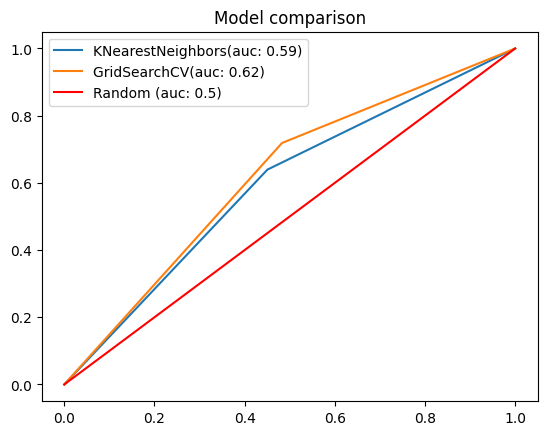

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_]
model_names = ['KNearestNeighbors', 'GridSearchCV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()
